In [1]:
#Import Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the dataset
df = pd.read_csv('E:/Research--Thesis/Data Set/strokeDataNoMissingValueUpdated.csv')

In [3]:
df.head()

,Gender,Age,Work Type,Residence Area,Married,Hyper Tension,Heart Disease,Smoking,Average Glucose Level,Weight(Kg),...,Serum Cholesterol,LDL,HDL,Triglyceried,HbA1c,Hb,RBC,WBC,ESR,Brain Stroke
0,1,85,3,1,1,1,0,0,8.0,62,...,158,90,48,98,8.863526,12.80,4.260000,12.00,20,1
1,1,85,4,0,1,1,0,0,7.0,55,...,167,108,44,101,8.863526,12.70,4.400000,10.85,9,1
2,1,65,5,0,1,1,0,0,5.0,50,...,167,108,44,106,8.863526,11.91,4.300000,4.00,6,1
3,1,55,1,0,1,1,0,0,5.2,70,...,141,73,47,104,10.200000,13.90,4.902467,20.00,35,1
4,1,65,1,1,1,1,1,0,7.1,50,...,156,81,40,169,8.863526,13.80,5.150000,9.00,13,1


In [4]:
#separate data and brain stroke
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [5]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [6]:
#Split train test data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state = 42)  

In [7]:
#Check number of brain stroke (yes) and brain stroke (no)  in the train data
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 112, 1: 157}

In [8]:
#Check number of brain stroke (yes) and brain stroke (no)  in the test data
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 39, 1: 77}

In [9]:
# Apply the random under-sampling for train dataset ( balance of train data)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True, random_state = 42)
X_train, y_train, idx_resampled = rus.fit_sample(X_train, y_train)

In [10]:
# Apply the random under-sampling for testing dataset (balance of test data)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True, random_state = 42)
X_test, y_test, idx_resampled = rus.fit_sample(X_test, y_test)

In [11]:
#Check number of brain stroke (yes) and brain stroke (no)  in the train data
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 112, 1: 112}

In [12]:
#Normalize the train dataset
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)

In [13]:
#Normalized the test dataset
X_test = min_max_scaler.transform(X_test)

In [14]:
Apply the random under-sampling for train dataset ( balance of train data)

In [15]:
# Use a grid over parameters of interest
parameters = {
            'penalty':['l2'],
            'C':[1,10,100],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
        }
GS = GridSearchCV(clf, parameters, cv=10, verbose=10)
GS.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] C=1, penalty=l2, solver=newton-cg ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... C=1, penalty=l2, solver=newton-cg, score=0.875, total=   0.3s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV]  C=1, penalty=l2, solver=newton-cg, score=0.9166666666666666, total=   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV]  C=1, penalty=l2, solver=newton-cg, score=0.9090909090909091, total=   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV]  C=1, penalty=l2, solver=newton-cg, score=0.9545454545454546, total=   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] ..... C=1, penalty=l2, solver=newton-cg, score=1.0, total=   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV]  C=1, penalty=l2, solver=newton-cg, score=0.9090909090909091, total=   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] ..... C=1, penalty=l2, solver=newton-cg, score=1.0, total=   0.0s
[CV] C=1, penalty=l2, solver=newton-c

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s


[CV] ....... C=1, penalty=l2, solver=lbfgs, score=0.875, total=   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV]  C=1, penalty=l2, solver=lbfgs, score=0.9166666666666666, total=   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV]  C=1, penalty=l2, solver=lbfgs, score=0.9090909090909091, total=   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV]  C=1, penalty=l2, solver=lbfgs, score=0.9545454545454546, total=   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV] ......... C=1, penalty=l2, solver=lbfgs, score=1.0, total=   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV]  C=1, penalty=l2, solver=lbfgs, score=0.9090909090909091, total=   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV] ......... C=1, penalty=l2, solver=lbfgs, score=1.0, total=   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ..................

C:\Users\Tipu\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Tipu\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Tipu\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Tipu\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Tipu\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

[CV]  C=10, penalty=l2, solver=sag, score=0.8636363636363636, total=   0.0s
[CV] C=10, penalty=l2, solver=sag ....................................
[CV] .......... C=10, penalty=l2, solver=sag, score=1.0, total=   0.0s
[CV] C=10, penalty=l2, solver=sag ....................................
[CV]  C=10, penalty=l2, solver=sag, score=0.9090909090909091, total=   0.0s
[CV] C=10, penalty=l2, solver=sag ....................................
[CV]  C=10, penalty=l2, solver=sag, score=0.8181818181818182, total=   0.0s
[CV] C=10, penalty=l2, solver=sag ....................................
[CV]  C=10, penalty=l2, solver=sag, score=0.9090909090909091, total=   0.0s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV]  C=100, penalty=l2, solver=newton-cg, score=0.9166666666666666, total=   0.0s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] . C=100, penalty=l2, solver=newton-cg, score=0.875, total=   0.0s
[CV] C=100, penalty=l2, solver=newton-cg ....

C:\Users\Tipu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Tipu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[CV]  C=100, penalty=l2, solver=lbfgs, score=0.9090909090909091, total=   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] ....... C=100, penalty=l2, solver=lbfgs, score=1.0, total=   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV]  C=100, penalty=l2, solver=lbfgs, score=0.8636363636363636, total=   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] ....... C=100, penalty=l2, solver=lbfgs, score=1.0, total=   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV]  C=100, penalty=l2, solver=lbfgs, score=0.9090909090909091, total=   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV]  C=100, penalty=l2, solver=lbfgs, score=0.8181818181818182, total=   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV]  C=100, penalty=l2, solver=lbfgs, score=0.8636363636363636, total=   0.0s
[CV] C=100, penalty=l2, solver=liblin

C:\Users\Tipu\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Tipu\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Tipu\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Tipu\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Tipu\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l2'], 'C': [1, 10, 100], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [16]:
#Get best paramers
print(GS.best_params_)

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [17]:
#Optimised the LogisticRegression classifier using these ‘new’ hyperparameters.
clf = LogisticRegression(C= 1.0, solver = 'newton-cg')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
#Prediction on test data
y_pred = clf.predict(X_test)
#Calculate accuracy
from sklearn import metrics
print("Accuracy %0.2f" % (100*metrics.accuracy_score(y_test, y_pred)))

Accuracy 94.87


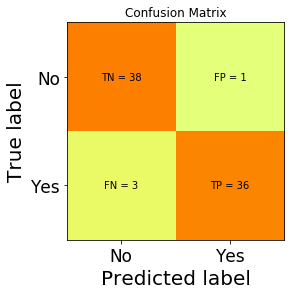

In [19]:
#Draw a confusion matrix
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix 
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No','Yes']
plt.title('Confusion Matrix',)
plt.ylabel('True label', fontsize =20)
plt.xlabel('Predicted label' , fontsize =20)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=0, fontsize = 17)
plt.yticks(tick_marks, classNames, fontsize = 17)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), horizontalalignment='center',verticalalignment='center' )

In [20]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        39
           1       0.97      0.92      0.95        39

   micro avg       0.95      0.95      0.95        78
   macro avg       0.95      0.95      0.95        78
weighted avg       0.95      0.95      0.95        78



In [21]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc=metrics.auc(fpr, tpr)

In [22]:
#Define a function for plotting ROC
def plotRoc(fpr, tpr):
    plt.figure()
    plt.plot(fpr, tpr, label="LG (AUC: {})".format(round(auc, 2)))
    plt.plot([0,1], [0, 1], "r--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate", fontsize = 23)
    plt.ylabel("True Positive Rate", fontsize = 23)
    plt.title("Reciever Operating Characterstic",fontsize = 23)
    plt.legend(loc="lower right", fontsize = 15)
    plt.show()

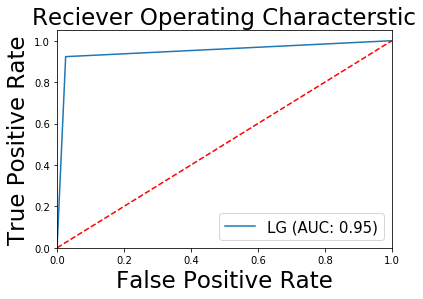

In [23]:
#Draw ROC curve
plotRoc(fpr,tpr)